<a href="https://colab.research.google.com/github/younghoonNa/pythonDT/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_8%EC%9D%BC%EC%B0%A8_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%9E%90%EC%A0%84%EA%B1%B0_%EB%8C%80%EC%97%AC%EB%9F%89_%EC%98%88%EC%B8%A1(%EB%82%98%EC%98%81%ED%9B%88).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 자전거 대여량 예측

워싱턴 D.C 소재의 자전거 대여 스타트업 Capital Bikeshare의 데이터를 활용하여, 특정 시간대에 얼마나 많은 사람들이 자전거를 대여하는지 예측하는 것이 목표입니다.

사람들이 자전거를 대여하는데는 많은 요소가 관여되어 있을 겁니다. 가령 **시간(새벽보다 낮에 많이 빌리겠죠)**, **날씨(비가 오면 자전거를 대여하지 않을 겁니다), 근무일(근무 시간에는 자전거를 대여하지 않겠죠)** 등. 이런 모든 요소를 조합하여 워싱턴 D.C의 자전거 교통량을 예측해주세요.

## 데이터 설명

#### 파일 구조
- train.csv
    - 학습을 위하여 활용되는 데이터 셋입니다.
- test.csv
    - 평가를 위하여 제공되는 데이터 셋입니다.
- submission.csv
    - test.csv 파일을 예측한 결과를 submission 파일에 작성한 후 제출합니다.
    
#### 컬럼 구조
  * **datetime** - 시간. 연-월-일 시:분:초 로 표현합니다. (가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초)
  * **season** - 계절. 봄(1), 여름(2), 가을(3), 겨울(4) 순으로 표현합니다.
  * **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아닙니다.
  * **workingday** - 근무일. 1이면 근무일이며, 0이면 근무일이 아닙니다.
  * **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같습니다.
    * 1: 아주 깨끗한 날씨입니다. 또는 아주 약간의 구름이 끼어있습니다.
    * 2: 약간의 안개와 구름이 끼어있는 날씨입니다.
    * 3: 약간의 눈, 비가 오거나 천둥이 칩니다.
    * 4: 아주 많은 비가 오거나 우박이 내립니다.
  * **temp** - 온도. 섭씨(Celsius)로 적혀있습니다.
  * **atemp** - 체감 온도. 마찬가지로 섭씨(Celsius)로 적혀있습니다.
  * **humidity** - 습도.
  * **windspeed** - 풍속.
  * **casual** - 비회원(non-registered)의 자전거 대여량.
  * **registered** - 회원(registered)의 자전거 대여량.
  * **count** - 총 자전거 대여랑. 비회원(casual) + 회원(registered)과 동일합니다.
  
  ## 프로젝트 구성
* 데이터 로드 (load data, train.csv, test.csv)
* 데이터 전처리 및 특성 공학 (train.csv, test.csv)
* 모델 생성 및 검증 (train.csv)
* 평가 데이터 예측 (test.csv)
* 결과 제출 및 점수 확인

## 제출 이력 및 순위 조회
[평가시스템](http://manage.jaen.kr)에 접속하여 확인 가능
> 로그인 -> 프로젝트 -> 자전거 대여량 예측 -> 리더보드

### 접속 정보
- ID : `본인이메일`
- PWD : `hl1227`

## 환경 설정

In [1]:
!wget http://49.247.133.7/hl_pjt.zip
!unzip hl_pjt.zip

--2022-01-05 07:04:40--  http://49.247.133.7/hl_pjt.zip
Connecting to 49.247.133.7:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194889 (190K) [application/zip]
Saving to: ‘hl_pjt.zip’

hl_pjt.zip          100%[===================>] 190.32K  --.-KB/s    in 0.1s    

2022-01-05 07:04:41 (1.44 MB/s) - ‘hl_pjt.zip’ saved [194889/194889]

Archive:  hl_pjt.zip
  inflating: submission.csv          
  inflating: test.csv                
  inflating: train.csv               


In [2]:
!pip install jaen

In [3]:
from JAEN.project import Project
pjt = Project('자전거 대여량 예측', 
              '한림대-데이터분석과정_전공자',        
              '1차수 A반',       
              'yh07280@naver.com')

In [4]:
# 성능 평가 함수
from sklearn.metrics import mean_squared_log_error
def rmsle(true, pred):
    return np.sqrt(mean_squared_log_error(true, pred)) 

## 모듈 import 

필요한 모듈을 import 합니다. 필요에 따라 추가 패키지를 load 할 수 있습니다.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2개의 데이터 셋트를 나누어 제공합니다.

1. train: 학습용 데이터 세트. 정답 값이라고 할 수 있는 `label` 값이 같이 제공됩니다.
2. test: 예측용 데이터 세트. 정답 값이 빠진 `feature` 들만 제공됩니다. 우리는 이 `feature`를 활용하여 예측을 진행합니다.
3. submission: 정답 제출용 데이터 세트. 주어진 형식에 맞춰 정답 값을 기입하고 제출합니다.

In [72]:
# train 데이터셋 로드 (train.csv)
train = pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [73]:
#datetime 열이 문자열이므로 먼저 처리해주고 넘어가기. > train 데이터
#quarter -> 뭔가 성능이 향상 되는거 같진 않음.. 분기랑 계절이랑 겹쳐서 그런가..
train['datetime'] = pd.to_datetime(train['datetime'])
train['hour'] = train['datetime'].dt.hour
train['year'] = train['datetime'].dt.year
train['dayofweek'] = train['datetime'].dt.dayofweek

In [74]:
#peak라는 속성 추가 공휴일일 때, 아닐 때 구분해서 / kaggle 사이클_데이터_셋 1등_모델 참조
train['peak'] = train[['hour', 'workingday']].apply(lambda x: (0, 1)[(x['workingday'] == 1 and \
    ( x['hour'] == 8 or 17 <= x['hour'] <= 18 or 12 <= x['hour'] <= 13)) or \
      (x['workingday'] == 0 and  10 <= x['hour'] <= 19)], axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  


In [75]:
#drop을 통해 datetime 이제 제거
train = train.drop('datetime' ,axis=1)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,dayofweek,peak
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,5,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011,5,0
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011,5,0
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011,5,0


In [76]:
# test 데이터셋 로드 (test.csv)
test = pd.read_csv('test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [77]:
#datetime 열이 문자열이므로 먼저 처리해주고 넘어가기. > test 데이터
test['datetime'] = pd.to_datetime(test['datetime'])
test['hour'] = test['datetime'].dt.hour
test['year'] = test['datetime'].dt.year
test['dayofweek'] = test['datetime'].dt.dayofweek

In [78]:
#peak라는 속성 추가 공휴일일 때, 아닐 때 구분해서 / kaggle 참조
test['peak'] = test[['hour', 'workingday']].apply(lambda x: (0, 1)[(x['workingday'] == 1 and \
    ( x['hour'] == 8 or 17 <= x['hour'] <= 18 or 12 <= x['hour'] <= 13)) or \
      (x['workingday'] == 0 and  10 <= x['hour'] <= 19)], axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  


In [79]:
#drop을 통해 datetime 이제 제거
test = test.drop('datetime' ,axis=1)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,dayofweek,peak
0,1,0,1,1,10.66,11.365,56,26.0027,0,2011,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,1,2011,3,0
2,1,0,1,1,10.66,13.635,56,0.0000,2,2011,3,0
3,1,0,1,1,10.66,12.880,56,11.0014,3,2011,3,0
4,1,0,1,1,10.66,12.880,56,11.0014,4,2011,3,0


In [14]:
# train column 별 데이터 개수, 타입 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  hour        10886 non-null  int64  
 12  dayofweek   10886 non-null  int64  
 13  peak        10886 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 1.2 MB


In [15]:
# test column 별 데이터 개수, 타입 확인
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      6493 non-null   int64  
 1   holiday     6493 non-null   int64  
 2   workingday  6493 non-null   int64  
 3   weather     6493 non-null   int64  
 4   temp        6493 non-null   float64
 5   atemp       6493 non-null   float64
 6   humidity    6493 non-null   int64  
 7   windspeed   6493 non-null   float64
 8   hour        6493 non-null   int64  
 9   dayofweek   6493 non-null   int64  
 10  peak        6493 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 558.1 KB


In [16]:
# train 결측치 확인 
train.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
hour          0
dayofweek     0
peak          0
dtype: int64

In [17]:
# test 결측치 확인
test.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
hour          0
dayofweek     0
peak          0
dtype: int64

In [18]:
#season은 모하는 친구일까?
train['season'].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

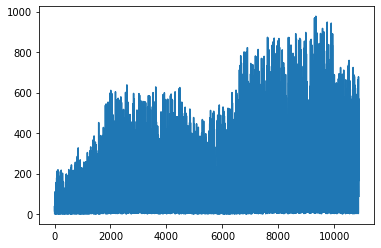

In [19]:
train['count'].plot()

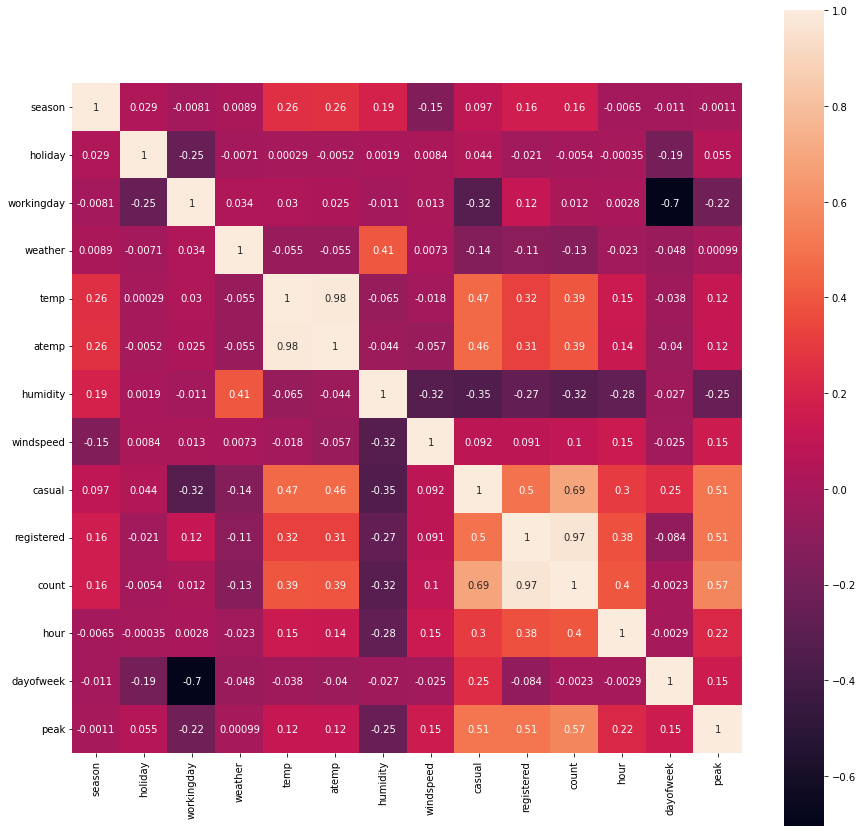

In [62]:
plt.subplots(figsize=(15,15))
sns.heatmap(train.corr(), mask=np.zeros_like(train.corr(), dtype=bool),
            square=True, annot=True)
plt.show()

In [21]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,dayofweek,peak
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613,3.013963,0.275951
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838,2.004585,0.447013
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000,1.000000,0.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000,3.000000,0.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000,5.000000,1.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000,6.000000,1.000000


In [80]:
# 학습에 사용할 특성 선택
# 추가 month	weekday	hour	year / 	quarter -> 제거
features = [
    'hour',
    'dayofweek',
    'year',
    'peak',
    'season',
    'holiday',
    'workingday',
    'weather',
    'temp',
    'atemp',
    'humidity',
    'windspeed',
]
features

['hour',
 'dayofweek',
 'year',
 'peak',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed']

In [81]:
# features의 컬럼을 X로 설정
X = train[features]
X

,hour,dayofweek,year,peak,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,0,5,2011,0,1,0,0,1,9.84,14.395,81,0.0000
1,1,5,2011,0,1,0,0,1,9.02,13.635,80,0.0000
2,2,5,2011,0,1,0,0,1,9.02,13.635,80,0.0000
3,3,5,2011,0,1,0,0,1,9.84,14.395,75,0.0000
4,4,5,2011,0,1,0,0,1,9.84,14.395,75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,19,2,2012,0,4,0,1,1,15.58,19.695,50,26.0027
10882,20,2,2012,0,4,0,1,1,14.76,17.425,57,15.0013
10883,21,2,2012,0,4,0,1,1,13.94,15.910,61,15.0013
10884,22,2,2012,0,4,0,1,1,13.94,17.425,61,6.0032


In [82]:
# count 컬럼의 값을 Y값으로 설정
Y = np.log1p(train['count'])
Y

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
10881    5.820083
10882    5.488938
10883    5.129899
10884    4.867534
10885    4.488636
Name: count, Length: 10886, dtype: float64

In [122]:
# 에러 발생 -> 원인은 np.log1p를 쓰지 않았기 때문...
# Y_registered = np.log(train['registered'])
# Y_registered

In [123]:
# 이거도 log 취해주고 exp로 안풀어줘서.. 선언은 했지만 사용 못함.
# Y_casual = np.log(train['casual']+1)
# Y_casual

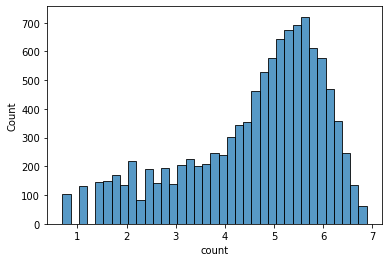

In [29]:
# seaborn 라이브러리의 histplot 함수를 이용하여 Y값 출력
sns.histplot(Y)

# 어떤 모델이 가장 좋을까? 

1. 랜덤 포리스트
2. 배깅
3. LGBM

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
#결정트리는 PASS
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

models=[RandomForestRegressor(), KNeighborsRegressor(), BaggingRegressor(), GradientBoostingRegressor(), XGBRegressor(), LGBMRegressor(),
        AdaBoostRegressor(), LogisticRegression(), LinearRegression(), SVR(kernel='poly'), SVR(kernel='rbf'),
        ]
     
model_names=['RandomForestRegressor', 'KNeighborsRegressor', 'BaggingRegressor', 'GradientBoostingRegressor', 'XGBRegressor', 'LGBMRegressor',
             'AdaBoostRegressor', 'LogisticRegression', 'LinearRegression', 'SVR_poly', 'SVR_rbf',
          ]
rmsle_list=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)

    k=0
    for i in test_pred:
      if i<0:
        test_pred[k] = 0
      k+=1

    rmsle_list.append(rmsle(test_pred,y_test))
d={'Modelling Algo':model_names,'RMSLE':rmsle_list}   
d
    

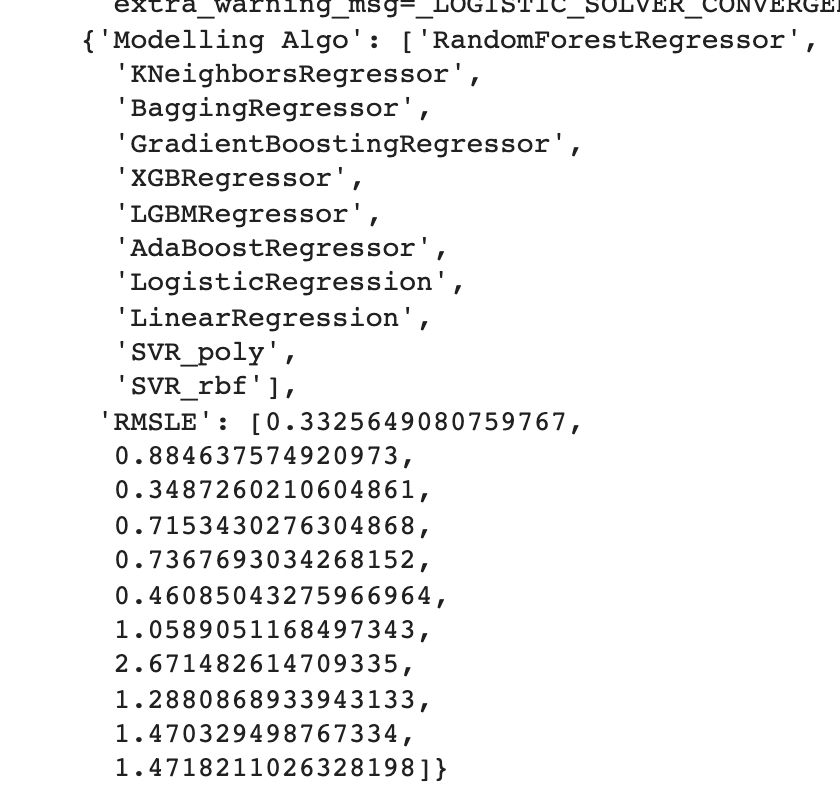

<font color=red> 랜덤포리스트&배깅 -> grid search 했는데도 효과 비슷.. </font>

<font color = blue > 그렇다면 LGBM 튜닝을 해보자! </font>

# 1. RandomForest

In [30]:
# # train 및 test 데이터 분할
#   # random_state = 0 지정
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train_ca, y_test_ca = train_test_split(X,Y_casual, random_state=0, test_size=0.05)

In [31]:
# # train 및 test 데이터 분할
#   # random_state = 0 지정
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train_r, y_test_r = train_test_split(X,Y_registered, random_state=0, test_size=0.05)

In [44]:
# RandomForestRegressor를 사용
  # random_state=123 지정
from sklearn.ensemble import RandomForestRegressor
model_rf_ca = RandomForestRegressor(random_state = 23).fit(X, Y_casual)
model_rf_ca.score(X, Y_casual)

0.9834711138417321

In [45]:
# RandomForestRegressor를 사용
  # random_state=123 지정
from sklearn.ensemble import RandomForestRegressor
model_rf_r = RandomForestRegressor(random_state = 23).fit(X, Y_registered)
model_rf_r.score(X, Y_registered)

0.9891037763632801

# 2. 강사님 추천 XGB

In [124]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

xgbr = xgb.XGBRegressor() 
xgbr.fit(X, Y)

scores_xgbr = cross_val_score(xgbr, X, Y ,cv=10)

print("score: %.2f" % scores_xgbr.mean())

[08:01:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:01:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:01:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:01:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:01:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:01:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:01:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:01:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

# 3. 내가 튜닝해본 LGBM

In [143]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(n_estimators = 2000)
lgbm_c = LGBMRegressor(n_estimators = 2000)
lgbm_r = LGBMRegressor(n_estimators = 2000)
# exp1을 쓰는걸 왜 까먹었을까.. 
# 나중에 count ->  casual	registered 분할해서 만들고 더하기 까지 해보기

In [144]:
lgbm.fit(X,Y)

LGBMRegressor(n_estimators=2000)

In [145]:
# 에러 발생 -> 원인은 np.log1p를 쓰지 않았기 때문...
Y_registered = np.log1p(train['registered'])
Y_registered

0        2.639057
1        3.496508
2        3.332205
3        2.397895
4        0.693147
           ...   
10881    5.799093
10882    5.446737
10883    5.105945
10884    4.770685
10885    4.442651
Name: registered, Length: 10886, dtype: float64

In [146]:
# 이거도 log 취해주고 exp로 안풀어줘서.. 선언은 했지만 사용 못함.
Y_casual = np.log1p(train['casual']+1)
Y_casual

0        1.609438
1        2.302585
2        1.945910
3        1.609438
4        0.693147
           ...   
10881    2.197225
10882    2.484907
10883    1.791759
10884    2.639057
10885    1.791759
Name: casual, Length: 10886, dtype: float64

In [148]:
lgbm_c.fit(X,Y_casual)
lgbm_r.fit(X,Y_registered)

LGBMRegressor(n_estimators=2000)

### <font color = red> 랜덤포리스트 - train/test 분할 할 때 썼던 잔해.. </font> 

In [36]:
# x_train에 대한 예측값 저장 
p_train_ca = model_rf_ca.predict(x_train)
p_train_r = model_rf_r.predict(x_train)

In [86]:
rmsle(Y, p_train_r)

0.1472208483998753

In [47]:
# x_test에 대한 예측값 저장 
p_test_ca = model_rf_ca.predict(X)
p_test_r = model_rf_r.predict(X)

In [48]:
rmsle(Y, p_test_ca + p_test_r)

0.36404751880047365

# Submission 업로드


In [49]:
# test 데이터 프레임을 대상으로 features 선택 (행, 열 확인)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,dayofweek,peak
0,1,0,1,1,10.66,11.365,56,26.0027,0,2011,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,1,2011,3,0
2,1,0,1,1,10.66,13.635,56,0.0000,2,2011,3,0
3,1,0,1,1,10.66,12.880,56,11.0014,3,2011,3,0
4,1,0,1,1,10.66,12.880,56,11.0014,4,2011,3,0


In [96]:
# submission 데이터셋 로드 (submission.csv)
submission = pd.read_csv('submission.csv')
submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


## LGBM 확인

In [137]:
pred = lgbm.predict(test[features])
submission['count'] =  np.expm1(pred)
submission.loc[submission['count']<0, 'count'] = 0
submission[submission['count']<0]

,datetime,count


In [150]:
lgbm_c.fit(X,Y_casual)
lgbm_r.fit(X,Y_registered)

pred_c = lgbm_c.predict(test[features])
pred_r = lgbm_r.predict(test[features])


submission['count'] =  np.expm1(pred_c) +  np.expm1(pred_r) 

In [151]:
#케글에 업로드하며 수치 확인하기 위해 csv 확인으로 변환.
submission.to_csv('submission_lstm.csv', index=False)

In [152]:
submission

,datetime,count
0,2011-01-20 00:00:00,16.594259
1,2011-01-20 01:00:00,4.558288
2,2011-01-20 02:00:00,3.807847
3,2011-01-20 03:00:00,3.144839
4,2011-01-20 04:00:00,2.390077
...,...,...
6488,2012-12-31 19:00:00,209.540733
6489,2012-12-31 20:00:00,125.679871
6490,2012-12-31 21:00:00,102.386849
6491,2012-12-31 22:00:00,86.786816


## XGB 확인

In [130]:
# test 데이터 프레임을 예측한 결과 대입 XGB
submission['count'] = xgbr.predict(test[features])
submission.loc[submission['count']<0, 'count'] = 0
submission[submission['count']<0]

,datetime,count


In [131]:
#케글에 업로드하며 수치 확인하기 위해 csv 확인으로 변환.
submission.to_csv('submission_xgb.csv', index=False)

In [109]:
submission

,datetime,count
0,2011-01-20 00:00:00,19.759269
1,2011-01-20 01:00:00,4.462512
2,2011-01-20 02:00:00,3.954145
3,2011-01-20 03:00:00,3.014751
4,2011-01-20 04:00:00,1.287687
...,...,...
6488,2012-12-31 19:00:00,216.774997
6489,2012-12-31 20:00:00,119.804123
6490,2012-12-31 21:00:00,87.649766
6491,2012-12-31 22:00:00,89.607728


## casual	registered 나눠서 더하려고 했었는데.. 왜 안됐을까..

-> 원인 : log 취해주고 exp1로 안풀어줬으니까.. 

In [51]:
# test 데이터 프레임을 예측한 결과 대입
submission['count'] = model_rf_ca.predict(test) + model_rf_r.predict(test)
submission[submission['count']<0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- year
Feature names seen at fit time, yet now missing:
- year

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- year
Feature names seen at fit time, yet now missing:
- year

  warnings.warn(message, FutureWarning)


,datetime,count


In [39]:
# # test 데이터 프레임을 예측한 결과 대입
# submission['count'] = model_rf.predict(test[features])
# submission[submission['count']<0]

# 순서대로 평가가 진행됩니다. 실행은 1회만 해주세요.

- 느리다고 중지 후 다시 평가 코드를 실행하는 경우 제출 과정에서 패널티가 발생할 수 있습니다. (제출 횟수 이슈 발생 가능)

In [153]:
# #shift + space로 무작정실행하다가 에러 나는 경우 방지하기 위해 우선 주석처리
pjt.submit(submission) # 제출 파일 생성 및 결과 제출

파일을 저장하였습니다. 파일명: submission-08-39-22.csv
제출 여부 :success
오늘 제출 횟수 : 7
제출 결과:0.39329


# 축하드립니다. 모델의 성능을 개선하여 더 좋은 점수를 획득해보세요!
* 데이터 전처리 (preprocessing)를 통하여, 결측치 처리
* 데이터 시각화를 통하여 이상치 처리 및 특성 처리
* 학습 특성 추가 사용
* **모델 앙상블(model ensemble)**을 통해 예측 성능 향상

### 1번째 train, test 비율 늘리기 0.3 -> 우선 0.05/0.1까지 낮추기 마지막 제출 때는 X 통째로 학습

-> 학습시 데이터는 많으면 많을 수록 좋다.

In [146]:
# train 및 test 데이터 분할
  # random_state = 0 지정
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state=0)

In [147]:
from xgboost import XGBRegressor
model = XGBRegressor().fit(x_train, y_train)
p_test = model.predict(x_test)
rmsle(p_test, y_test)

[05:18:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


ValueError: ignored

[02:56:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'Modelling Algo': ['RandomForestRegressor',
  'KNeighborsRegressor',
  'BaggingRegressor',
  'GradientBoostingRegressor',
  'XGBRegressor',
  'LGBMRegressor',
  'AdaBoostRegressor',
  'LogisticRegression',
  'LinearRegression',
  'SVR_poly',
  'SVR_rbf'],
 'RMSLE': [0.3325649080759767,
  0.884637574920973,
  0.3487260210604861,
  0.7153430276304868,
  0.7367693034268152,
  0.46085043275966964,
  1.0589051168497343,
  2.671482614709335,
  1.2880868933943133,
  1.470329498767334,
  1.4718211026328198]}

In [ ]:
# train 및 test 데이터 분할
  # random_state = 0 지정
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state=0, test_size = 0.05)

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

models=[RandomForestRegressor(), AdaBoostRegressor(), BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor', 'AdaBoostRegressor', 'BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    
    k=0
    for i in test_pred:
      if i<0:
        test_pred[k] = 0
      k+=1
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d
    

### 또 다른 모델 

-> PolynomialFeatures 도전 해보려 했지만.. 시간부족.. 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree = 3)

## season과 weather의 경우 원래는 범주형 데이터인데 int형으로 나온다 -> get_dummies를 사용한다면? 

### 47801 (전) / 47648

#### -> 효과 별로... 실행 X

In [65]:
train

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,year,day,dayofweek,weather_1,weather_2,weather_3,weather_4,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
0,0,0,9.84,14.395,81,0.0000,3,13,16,1,0,2011,1,5,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,0.0000,8,32,40,1,1,2011,1,5,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,0.0000,5,27,32,1,2,2011,1,5,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,0,0,9.84,14.395,75,0.0000,3,10,13,1,3,2011,1,5,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,0,0,9.84,14.395,75,0.0000,0,1,1,1,4,2011,1,5,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,19.695,50,26.0027,7,329,336,12,19,2012,19,2,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
10882,0,1,14.76,17.425,57,15.0013,10,231,241,12,20,2012,19,2,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
10883,0,1,13.94,15.910,61,15.0013,4,164,168,12,21,2012,19,2,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
10884,0,1,13.94,17.425,61,6.0032,12,117,129,12,22,2012,19,2,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


In [148]:
#범주형 데이터 이지만 int형으로 표시된 season, weather를 get_dummies 사용
weather_dummmies = pd.get_dummies(train['weather'], prefix='weather')
season_dummmies = pd.get_dummies(train['season'], prefix='season')
train = pd.concat((train, weather_dummmies), axis=1)
train = pd.concat((train, season_dummmies), axis=1)
train = train.drop(['weather', 'season'], axis = 1)
train

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,year,day,dayofweek,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
0,0,0,9.84,14.395,81,0.0000,3,13,16,1,0,2011,1,5,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,0.0000,8,32,40,1,1,2011,1,5,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,0.0000,5,27,32,1,2,2011,1,5,1,0,0,0,1,0,0,0
3,0,0,9.84,14.395,75,0.0000,3,10,13,1,3,2011,1,5,1,0,0,0,1,0,0,0
4,0,0,9.84,14.395,75,0.0000,0,1,1,1,4,2011,1,5,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,19.695,50,26.0027,7,329,336,12,19,2012,19,2,1,0,0,0,0,0,0,1
10882,0,1,14.76,17.425,57,15.0013,10,231,241,12,20,2012,19,2,1,0,0,0,0,0,0,1
10883,0,1,13.94,15.910,61,15.0013,4,164,168,12,21,2012,19,2,1,0,0,0,0,0,0,1
10884,0,1,13.94,17.425,61,6.0032,12,117,129,12,22,2012,19,2,1,0,0,0,0,0,0,1


In [149]:
test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,hour,year,day,dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,1,0,2011,20,3
1,1,0,1,1,10.66,13.635,56,0.0000,1,1,2011,20,3
2,1,0,1,1,10.66,13.635,56,0.0000,1,2,2011,20,3
3,1,0,1,1,10.66,12.880,56,11.0014,1,3,2011,20,3
4,1,0,1,1,10.66,12.880,56,11.0014,1,4,2011,20,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,12,19,2012,31,0
6489,1,0,1,2,10.66,12.880,60,11.0014,12,20,2012,31,0
6490,1,0,1,1,10.66,12.880,60,11.0014,12,21,2012,31,0
6491,1,0,1,1,10.66,13.635,56,8.9981,12,22,2012,31,0


In [150]:
#범주형 데이터 이지만 int형으로 표시된 season, weather를 get_dummies 사용
weather_dummmies = pd.get_dummies(test['weather'], prefix='weather')
season_dummmies = pd.get_dummies(test['season'], prefix='season')
test = pd.concat((test, weather_dummmies), axis=1)
test = pd.concat((test, season_dummmies), axis=1)
test = test.drop(['weather', 'season'], axis = 1)
test

,holiday,workingday,temp,atemp,humidity,windspeed,month,hour,year,day,dayofweek,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
0,0,1,10.66,11.365,56,26.0027,1,0,2011,20,3,1,0,0,0,1,0,0,0
1,0,1,10.66,13.635,56,0.0000,1,1,2011,20,3,1,0,0,0,1,0,0,0
2,0,1,10.66,13.635,56,0.0000,1,2,2011,20,3,1,0,0,0,1,0,0,0
3,0,1,10.66,12.880,56,11.0014,1,3,2011,20,3,1,0,0,0,1,0,0,0
4,0,1,10.66,12.880,56,11.0014,1,4,2011,20,3,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,0,1,10.66,12.880,60,11.0014,12,19,2012,31,0,0,1,0,0,1,0,0,0
6489,0,1,10.66,12.880,60,11.0014,12,20,2012,31,0,0,1,0,0,1,0,0,0
6490,0,1,10.66,12.880,60,11.0014,12,21,2012,31,0,1,0,0,0,1,0,0,0
6491,0,1,10.66,13.635,56,8.9981,12,22,2012,31,0,1,0,0,0,1,0,0,0


In [151]:
# 학습에 사용할 특성 선택
# 추가 month hour	year day, dayofweekend
features = [
    'month',
    'hour',
    'year',
    'day',
    'weather_1',
    'weather_2',
    'weather_3',
    'weather_4',
    'season_1',
    'season_2',
    'season_3',
   	'season_4',	
    'dayofweek',
    'holiday',
    'workingday',
    'temp',
    'atemp',
    'humidity',
    'windspeed',
]
features

['month',
 'hour',
 'year',
 'day',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'dayofweek',
 'holiday',
 'workingday',
 'temp',
 'atemp',
 'humidity',
 'windspeed']

In [152]:
X = train[features]
X

,month,hour,year,day,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4,dayofweek,holiday,workingday,temp,atemp,humidity,windspeed
0,1,0,2011,1,1,0,0,0,1,0,0,0,5,0,0,9.84,14.395,81,0.0000
1,1,1,2011,1,1,0,0,0,1,0,0,0,5,0,0,9.02,13.635,80,0.0000
2,1,2,2011,1,1,0,0,0,1,0,0,0,5,0,0,9.02,13.635,80,0.0000
3,1,3,2011,1,1,0,0,0,1,0,0,0,5,0,0,9.84,14.395,75,0.0000
4,1,4,2011,1,1,0,0,0,1,0,0,0,5,0,0,9.84,14.395,75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,12,19,2012,19,1,0,0,0,0,0,0,1,2,0,1,15.58,19.695,50,26.0027
10882,12,20,2012,19,1,0,0,0,0,0,0,1,2,0,1,14.76,17.425,57,15.0013
10883,12,21,2012,19,1,0,0,0,0,0,0,1,2,0,1,13.94,15.910,61,15.0013
10884,12,22,2012,19,1,0,0,0,0,0,0,1,2,0,1,13.94,17.425,61,6.0032


In [153]:
Y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [84]:
# train 및 test 데이터 분할
  # random_state = 0 지정
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state=0, test_size=0.05)

In [85]:
# RandomForestRegressor를 사용
  # random_state=123 지정
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(random_state = 123).fit(x_train, y_train)
model_rf.score(x_train, y_train), model_rf.score(x_test, y_test)
# ?? score 왜그러니.. -> 날짜 데이터 추가해서 극복

(0.9932456097854895, 0.9494461208031826)

## 스케일링 차이 확인 -> 트리라서 별 차이 없음.

In [158]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [161]:
X_scaled = scaler.fit_transform(X)

In [162]:
# train 및 test 데이터 분할
  # random_state = 0 지정
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state=0, test_size=0.05)

In [163]:
# RandomForestRegressor를 사용
  # random_state=123 지정
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(random_state = 123).fit(x_train, y_train)
model_rf.score(x_train, y_train), model_rf.score(x_test, y_test)
# ?? score 왜그러니.. -> 날짜 데이터 추가해서 극복

(0.9932456097854895, 0.9494461208031826)

## 시계열부분 프로프넷 호기심에 사용

In [169]:
# train 데이터셋 로드 (train.csv)
train = pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [210]:
df = train.loc[:, ('datetime', 'count')]
df.columns = ['ds', 'y']
df

,ds,y
0,2011-01-01 00:00:00,16
1,2011-01-01 01:00:00,40
2,2011-01-01 02:00:00,32
3,2011-01-01 03:00:00,13
4,2011-01-01 04:00:00,1
...,...,...
10881,2012-12-19 19:00:00,336
10882,2012-12-19 20:00:00,241
10883,2012-12-19 21:00:00,168
10884,2012-12-19 22:00:00,129


In [211]:
# train 데이터셋 로드 (train.csv)
test = pd.read_csv('test.csv')
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [212]:
from fbprophet import Prophet
Prophet_model = Prophet()
Prophet_model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [213]:
submission.columns = ['ds', 'y']
df_fin = submission
df_fin['y'] = 0
df_fin

,ds,y
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [214]:
df_fin['y'] = Prophet_model.predict(df_fin)['trend']
df_fin

,ds,y
0,2011-01-20 00:00:00,48.655387
1,2011-01-20 01:00:00,48.691912
2,2011-01-20 02:00:00,48.728436
3,2011-01-20 03:00:00,48.764961
4,2011-01-20 04:00:00,48.801486
...,...,...
6488,2012-12-31 19:00:00,217.615515
6489,2012-12-31 20:00:00,217.594217
6490,2012-12-31 21:00:00,217.572920
6491,2012-12-31 22:00:00,217.551622


In [215]:
df_fin.columns = ['datetime', 'count']

## log를 씌워서 XGBoost / LGBM 써보자 -> 위에랑 합체

-> exp1로 로그를 풀어서 제출하는 걸 까먹지 않았다면.. 더 많은 걸 했을텐데..

In [222]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,ds,casual_log,registered_log,count_log
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,1.386294,2.639057,2.833213
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2.197225,3.496508,3.713572
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,1.791759,3.332205,3.496508
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,1.386294,2.397895,2.639057
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,0.000000,0.693147,0.693147
